In [1]:
import sympy as sy
import scipy as sp
from scipy import optimize as opt
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.core.interactiveshell import InteractiveShell
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

## Cann a linear model learn the AND and XOR functions?

\begin{equation}
X = \begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 0\\
1 & 0 & 1\\
1 & 0 & 0\\
\end{bmatrix},
y_{and} = \begin{bmatrix}
1 \\
0 \\
0 \\
0 \\ \end{bmatrix}
\end{equation}

\begin{equation}
X = \begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 0\\
1 & 0 & 1\\
1 & 0 & 0\\
\end{bmatrix},
y_{xor} = \begin{bmatrix}
0 \\
1 \\
1 \\
0 \\ \end{bmatrix}
\end{equation}

Will use mean squared error for now, but notice binary ouput should be measured with binary cross entropy

In [2]:
X = sy.Matrix([[1,1,1],
               [1,1,0],
               [1,0,1],
               [1,0,0]])
y_xor = sy.Matrix([[0],
                   [1],
                   [1],
                   [0]])
y_and = sy.Matrix([[1],
                   [0],
                   [0],
                   [0]])
w1,w2,w3 = sy.symbols("w_1,w_2,w_3")
w_xor = sy.Matrix([[w1],[w2],[w3]])

The assumed model is then:

\begin{equation}
Xw = \begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 0\\
1 & 0 & 1\\
1 & 0 & 0\\
\end{bmatrix} 
\begin{bmatrix}
w_1 \\
w_2 \\
w_3 \\ \end{bmatrix} =y
\end{equation}

defining cost function for linear model:

In [3]:
def J(w,X, Y):
    '''Cost function for linear model with mean squared errror loss function'''
    m = (1/4 * (X@w -Y).T @ (X@w - Y)).mean(0) 
    return sum(m) /len(m)


def opts(J,w0, X,Y):
    return opt.minimize(J, w0, args=(X,Y))


def predictor(x,w_s):
    return X@w_s

def results(y, fixed_init=True):
    w0_r = np.random.uniform(low=0.0, high=1.0, size=(3,1))
    w0_f = np.array([[1/2],
                     [1/2],
                     [1/2]])
    w0 = w0_f if fixed_init else w0_r
    res = opts(J,
             w0,
             np.array(X).astype(np.float),
             np.array(y).astype(np.float))
    y_hat = predictor(X,res.x)
    print("True:\n", y)
    print("Pred:\n", sy.Matrix(y_hat))
    print("\n")
    return np.vstack( (np.array(y)[:,0],y_hat) ).T

    
labels_preds = []
for gate,y in zip(["AND","XOR"],[y_and, y_xor]):
    print("*"*10,"Gate:", gate,"*"*10)
    labels_preds.append(results(y))
    
gate_results = list(zip(["AND","XOR"],labels_preds))

********** Gate: AND **********
True:
 Matrix([[1], [0], [0], [0]])
Pred:
 Matrix([[0.499999998947900], [0.249999995373210], [0.249999995373210], [-8.20147927349524e-9]])


********** Gate: XOR **********
True:
 Matrix([[0], [1], [1], [0]])
Pred:
 Matrix([[0.833333337170653], [0.500000001636226], [0.500000001636226], [0.166666666101800]])




## Notice!
No matter how you initialise the optimization process, the XOR function will always not be linearly separable, and hence it can not be modelled with a shallow network. 

In [4]:
InteractiveShell.ast_node_interactivity = "last"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


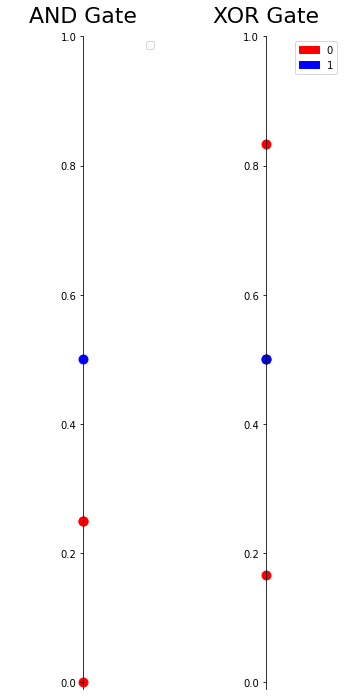

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(6,12))

for ax_id, gate_result in enumerate(gate_results):
    axes[ax_id].set_title(f"{gate_result[0]} Gate",pad=14, fontsize=22)
    for (label,output) in gate_result[1]:
        c = "blue" if bool(label) else "red"
        axes[ax_id].scatter(x=0, y=output, s=80, c=c) 
     
    axes[ax_id].spines['left'].set_position(('data', 0))
    axes[ax_id].spines['top'].set_visible(False)
    axes[ax_id].spines['right'].set_visible(False)
    axes[ax_id].spines['bottom'].set_visible(False)
    axes[ax_id].yaxis.get_major_ticks()[0].label1.set_visible(False)
    axes[ax_id].get_xaxis().set_visible(False)
    axes[ax_id].set_ylim([-0.01, 1])
    axes[ax_id].legend(loc="upper right")
    
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
plt.legend(handles=[red_patch, blue_patch])

I can always cut the axis (and create a _decision boundary_) such that the two different labels (blue and red) appear on one side of the _decision boundary_ for our linear model of the __AND Gate__. I cannot do the same with the linear model of the __XOR Gate__; the model does not produce a linearly separable space on which we can parition the labels. 